<a href="https://colab.research.google.com/github/dvtran63/ai-learning-notebooks/blob/main_b1/day7c_full_model_eval_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Day 7 Bonus: Model Evaluation & Feature Importance

This notebook compares precision, recall, F1 score, and ROC curves for Decision Tree, Logistic Regression, and KNN.
It also explores feature importance for Decision Tree and Logistic Regression.

## 🔁 Reuse Preprocessed Titanic Dataset

In [15]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset("titanic")
df = df.dropna(subset=["age", "embarked", "fare", "sex"])

df.loc[:,"sex"] = df["sex"].map({"male": 0, "female": 1})
df.loc[:,"embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

features = ["pclass", "sex", "age", "fare", "embarked"]
X = df[features]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

     pclass sex   age      fare embarked
641       1   1  24.0   69.3000        1
496       1   1  54.0   78.2667        1
262       1   0  52.0   79.6500        0
311       1   1  18.0  262.3750        1
551       2   0  27.0   26.0000        0
..      ...  ..   ...       ...      ...
362       3   1  45.0   14.4542        1
56        2   1  21.0   10.5000        0
137       1   0  37.0   53.1000        0
651       2   1  18.0   23.0000        0
74        3   0  32.0   56.4958        0

[143 rows x 5 columns]


## ⚙️ Train 3 Models: Decision Tree, Logistic Regression, KNN

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)

tree.fit(X_train, y_train)
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_pred_log = logreg.predict(X_test)
y_pred_knn = knn.predict(X_test)

y_prob_tree = tree.predict_proba(X_test)[:, 1]
y_prob_log = logreg.predict_proba(X_test)[:,1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]

print(X_test.shape,y_pred_log, y_prob_log)

(143, 5) [1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0] [0.94912009 0.87866245 0.33391809 0.93032968 0.23733696 0.60357541
 0.45559623 0.82286363 0.38638394 0.56341452 0.09424146 0.13367441
 0.08668209 0.23131844 0.54111632 0.06518859 0.85702798 0.06862857
 0.94472945 0.85237691 0.08668209 0.67586008 0.93715218 0.23098849
 0.07317894 0.67994765 0.09611702 0.64351434 0.06922893 0.68546308
 0.79904193 0.06355417 0.07288716 0.08901318 0.44164903 0.18856673
 0.1425426  0.96311469 0.842041   0.10227649 0.22405227 0.13782092
 0.04888049 0.02959787 0.06142905 0.04605606 0.09153745 0.35077533
 0.24777342 0.12712846 0.20277003 0.06716059 0.51756189 0.07529128
 0.04741038 0.86724836 0.37642978 0.43076527 0.07970858 0.30086722
 0.4005764  0.4607497  0.05177

## 📈 Classification Reports

In [4]:
from sklearn.metrics import classification_report

print("📊 Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("📊 Decision Tree:")
print(classification_report(y_test, y_pred_tree))

print("📊 KNN:")
print(classification_report(y_test, y_pred_knn))

📊 Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

📊 Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        80
           1       0.68      0.67      0.67        63

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143

📊 KNN:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        80
           1       0.83      0.63      0.72        63

    accuracy                           0.78       143
   macro avg       0.80      0.77      0.77       143
weighted avg       0.79    

## 📉 ROC Curves and AUC

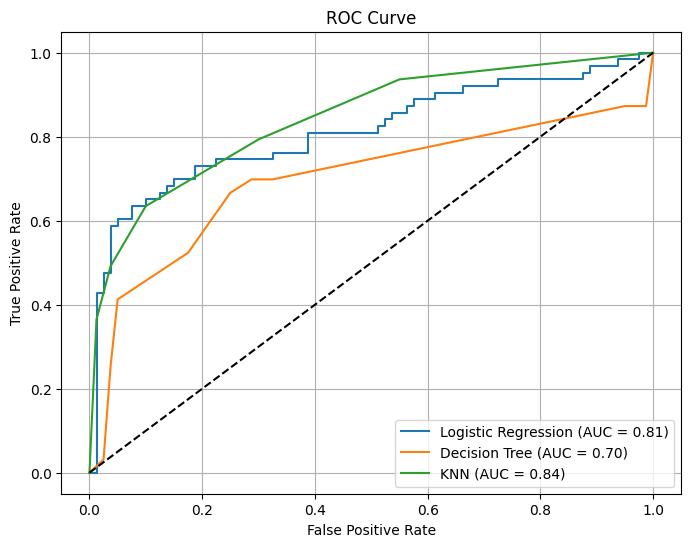

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_tree):.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_score(y_test, y_prob_knn):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Feature Importance: Decision Tree

pclass: 0.2303
sex: 0.5593
age: 0.1136
fare: 0.0968
embarked: 0.0000


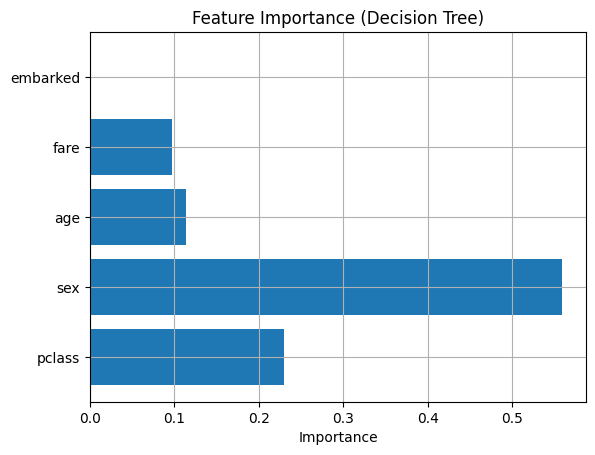

In [6]:
import numpy as np

importances = tree.feature_importances_
for name, importance in zip(features, importances):
    print(f"{name}: {importance:.4f}")

plt.barh(features, importances)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.grid(True)
plt.show()

## 📊 Feature Coefficients: Logistic Regression

pclass: -1.1562
sex: 1.2565
age: -0.4359
fare: -0.1251
embarked: 0.0587


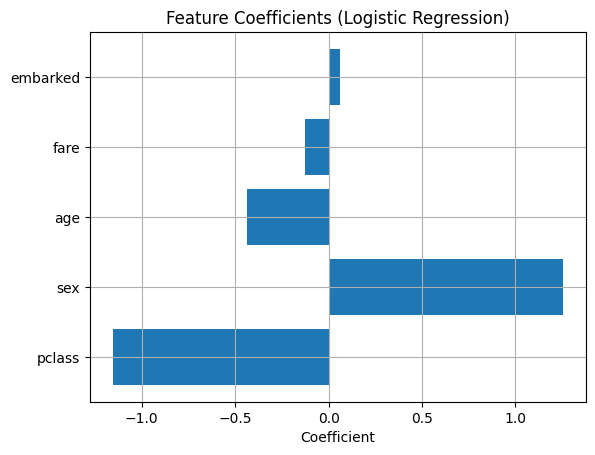

In [7]:
coefficients = logreg.coef_[0]
for name, coef in zip(features, coefficients):
    print(f"{name}: {coef:.4f}")

plt.barh(features, coefficients)
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient")
plt.grid(True)
plt.show()

## 🧮 Confusion Matrices

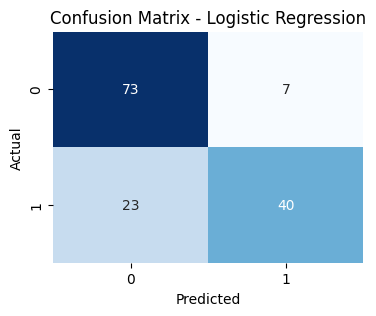

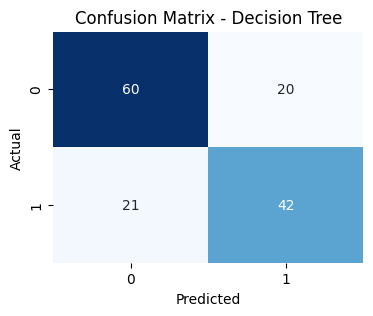

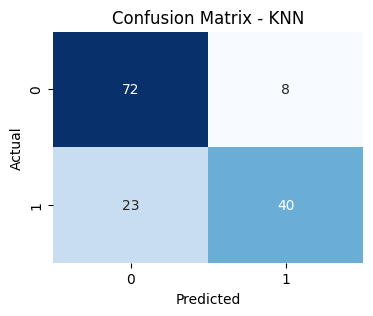

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "KNN": y_pred_knn
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## 📉 Precision-Recall Curves

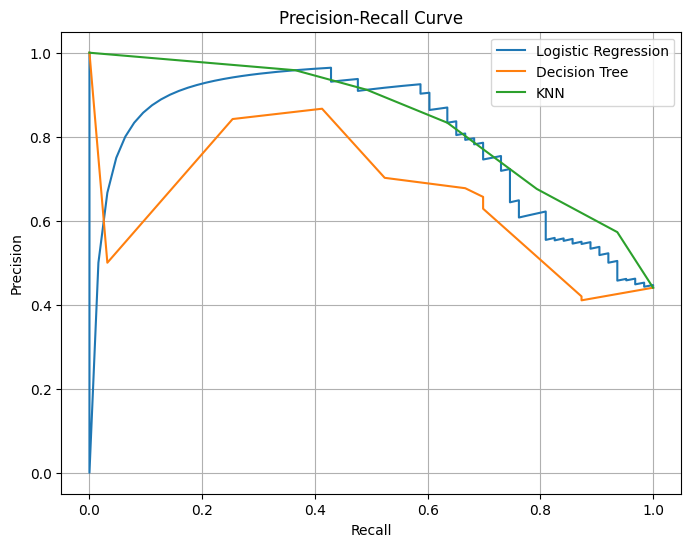

In [9]:
from sklearn.metrics import precision_recall_curve

prec_log, rec_log, _ = precision_recall_curve(y_test, y_prob_log)
prec_tree, rec_tree, _ = precision_recall_curve(y_test, y_prob_tree)
prec_knn, rec_knn, _ = precision_recall_curve(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(rec_log, prec_log, label="Logistic Regression")
plt.plot(rec_tree, prec_tree, label="Decision Tree")
plt.plot(rec_knn, prec_knn, label="KNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# 🌲 1. Add SVM and Random Forest Models

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

# Train
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest predict:",y_pred_rf,'\nproba:',y_prob_rf)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]


Random Forest predict: [1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1] 
proba: [1.         0.99       0.54       0.97       0.13       0.24
 0.73       0.81       0.39       0.37       0.12       0.02166667
 0.         0.15       0.72       0.50295238 0.81933333 0.18
 0.96       0.65783333 0.         0.95       1.         0.02
 0.01       0.73       0.01       0.66       0.05       0.73
 0.97       0.05       0.59       0.01       0.31       0.01
 0.17       0.92       0.9        0.07       0.17       0.23
 0.         0.02       0.05       0.33004762 0.035      0.23
 0.01       0.51       0.09366667 0.20486905 0.53       0.39
 0.064      0.58       0.44       0.66       0.59       0.02
 0.73       0.42       0.0865     0.93       0.02       0.
 0.

# 🧪 2. Evaluate SVM and Random Forest

In [11]:
from sklearn.metrics import classification_report

print("📊 Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("📊 Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))


📊 Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        80
           1       0.75      0.71      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143

📊 Support Vector Machine:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.87      0.63      0.73        63

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



# 📈 3. ROC Curve & Precision-Recall Curves (Add to existing plots)

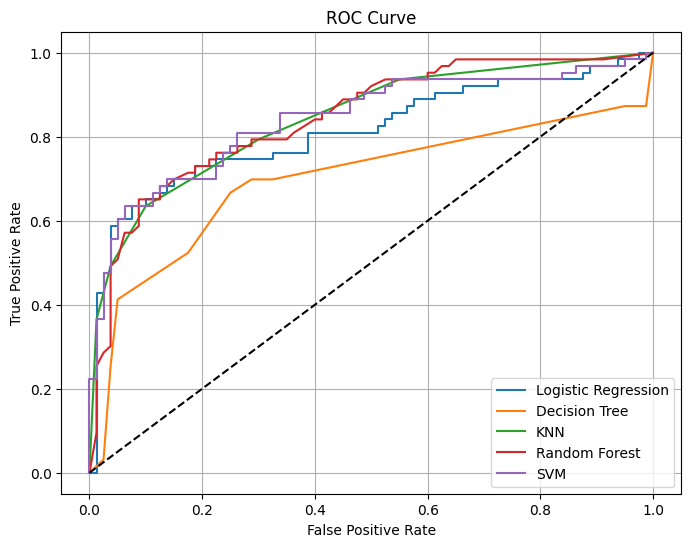

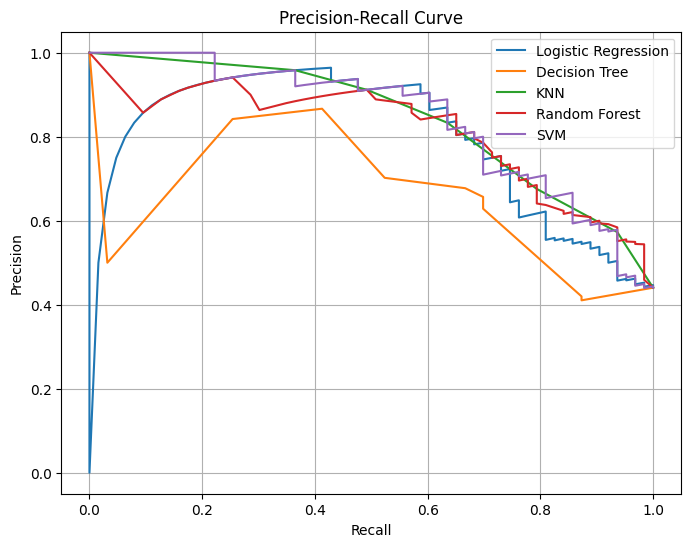

In [32]:
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Precision-Recall
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_prob_svm)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(rec_log, prec_log, label="Logistic Regression")
plt.plot(rec_tree, prec_tree, label="Decision Tree")
plt.plot(rec_knn, prec_knn, label="KNN")
plt.plot(rec_rf, prec_rf, label="Random Forest")
plt.plot(rec_svm, prec_svm, label="SVM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


# ⚖️ 4. Optional: Class Balancing (Upsample minority class)

In [34]:
from sklearn.utils import resample

# Combine into one DataFrame
df_bal = df.copy()
X_bal = df_bal[features]
y_bal = df_bal["survived"]

# Separate majority and minority
df_majority = df_bal[y_bal == 0]
df_minority = df_bal[y_bal == 1]
print(df_majority.shape, df_minority.shape)

# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# New X and y
X_bal = df_upsampled[features]
y_bal = df_upsampled["survived"]

# Re-split
from sklearn.model_selection import train_test_split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Re-scale
X_train_bal = scaler.fit_transform(X_train_bal)
X_test_bal = scaler.transform(X_test_bal)

#You can now retrain any model using X_train_bal and y_train_bal to evaluate the effect of class balancing.


(424, 15) (288, 15)


# 💾 5. Export Predictions and Save Models

In [ ]:
import joblib
import pandas as pd

# Save models
joblib.dump(logreg, "logreg_model.pkl")
joblib.dump(tree, "tree_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(rf, "rf_model.pkl")
joblib.dump(svm, "svm_model.pkl")

# Export predictions
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Logistic": y_pred_log,
    "Tree": y_pred_tree,
    "KNN": y_pred_knn,
    "RandomForest": y_pred_rf,
    "SVM": y_pred_svm
})
pred_df.to_csv("model_predictions.csv", index=False)
print("✅ Models and predictions saved.")
